### Линейные модели - recap

Строя модели машинного обучения мы фактически пытаемся найти функциональную зависимость между данными и целевой переменной.

Один из видов такой зависимости является линейная зависимость

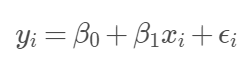

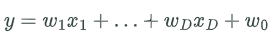

Также графически данные формулы можно представить в таком виде:


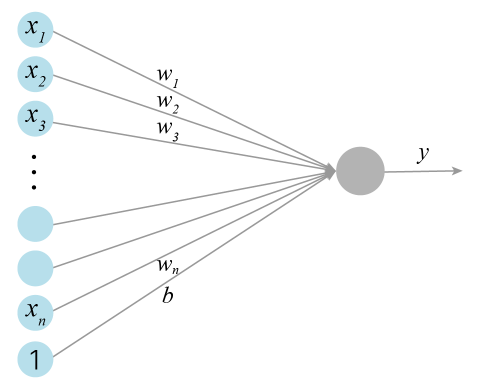

Если линейная модель имеет множество выходов, то каждый выход $\large y_j$ имеет свой собственный вектор весов $\large \vec{w_j}$ и свое смещение $\large b_j$ :

$$ \large y_j = \left(\vec{x}, \vec{w_j}\right) + b_j \ \ \ \ \ \ \ j= 1 ... C,$$

где $\large \vec{w_j}=\left[w_{1j}, w_{2j}, ... w_{nj}\right]^\top$.

Здесь матрица весовых коэффициентов $\large W$ образуется путем объединения векторов весовых коэффициентов для каждого выхода, а вектор смещений $\large \vec{b}$ — соответственно путем объединения смещений всех выходов:

$$ \large
\begin{eqnarray*}
W & = & \left[\vec{w_1}, \vec{w_2}, ... \vec{w_C}\right]\\
\vec{b} & = & \left[b_1, b_2, ... b_c\right]
\end{eqnarray*}
$$

Графически это можно представить следующим образом:

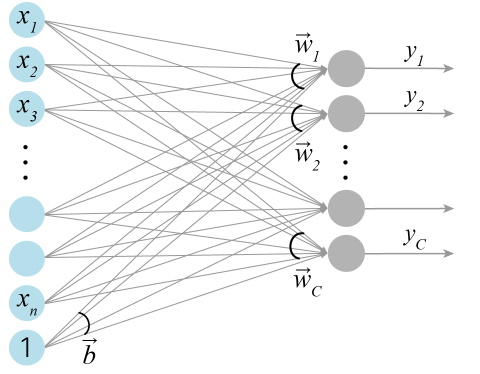

**Note**: в логистической регрессии для бинарного случая также применяется нелинейная функция - sigmoid - для превращения логитов в вероятности, а для многоклассового случая существует функция softmax с аналогичным поведением, но пока опустим этот факт и сконцентрируемся на весах модели

В линейном классификаторе каждый выход модели отвечает за свой класс. Мы можем ожилать, что в процессе обучения линейного классификатора весовые вектора разных выходов выучат некий обобщенный "шаблон" образцов данного класса.

Тогда при подаче на вход нового образца один из шаблонов будет "подходить" больше других, и соответствующий выход будет получать наибольшее значение взвешенной суммы и, соответственно, наибольшую вероятность

#### Ограничения линейных моделей

По мере усложнения структуры данных становится выше **внутриклассовая вариативность**. Это значит, что объекты внутри каждого класса могут достаточно сильно различаться.

Ограничение линейного классификатора состоит в том, что для каждого класса существует только один шаблон. Шаблон каждого класса будет пытаться вобрать в себя информацию обо всех объектах класса сразу и не сможет качественно отразить вариативность данных.

Попросту говоря, линейная модель слишком проста для сложных данных и будет **недообучаться**.

Помимо описанной сложности, линейные модели классификации способны качественно работать в условиях линейной разделимости классов, что бывает далеко не всегда

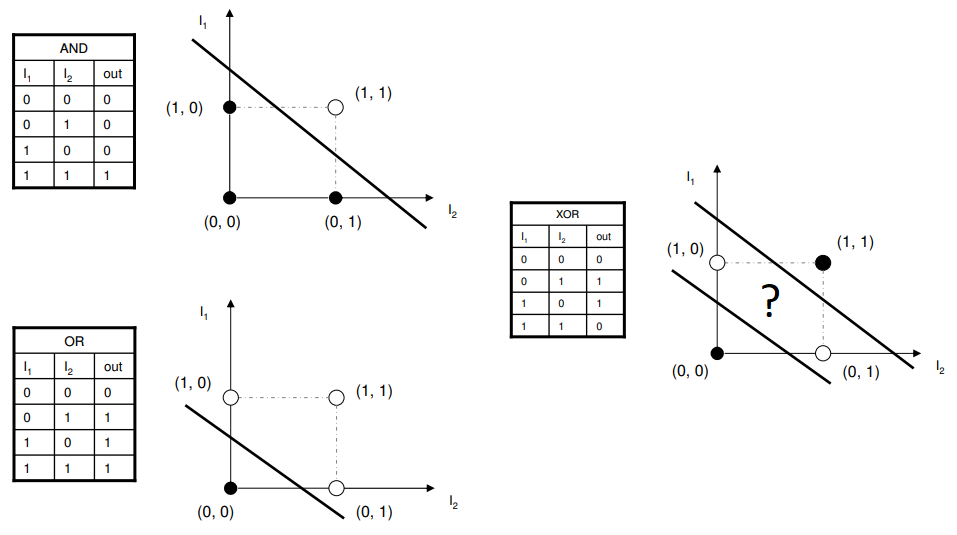

#### Проверим это на практике

#### Sklearn Logistic Regression

In [ ]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('Electrical_Grid_Stability.csv', sep=';')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stability
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0


In [ ]:
X, y = df.drop('stability', axis=1), df['stability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1307
           1       0.74      0.72      0.73       693

    accuracy                           0.82      2000
   macro avg       0.80      0.79      0.80      2000
weighted avg       0.82      0.82      0.82      2000



### PyTorch Intro

Pytorch - один из самых популярных фреймворков глубокого обучения для ML-специалистов. Фактически сегодня это еще и целая [экосистема](https://pytorch.org/ecosystem/) инструментов

- [torchtext](https://pytorch.org/text/stable/index.html#torchtext) - `package consists of data processing utilities and popular datasets for natural language`


В библиотеке есть четыре ключевых составляющих:

- Развитый инструментарий для работы с тензорами. Он похож на numpy, но даёт дополнительные возможности по контролю выделяемой памяти, что важно при работе с большими моделями и данными.
- Простое построение динамического вычислительного графа, позволяющего получать градиенты целевых функций от параметров модели.
- Большой набор готовых слоёв для построения нейронных сетей произвольной архитектуры.
- Возможность перенаправлять вычисления на графические процессоры GPU.



In [ ]:
import torch

#### Тензоры


Создание тензора

In [ ]:
x = torch.empty(5, 3)
print(x)

tensor([[-6.7967e-07,  4.5666e-41, -7.3119e-07],
        [ 4.5666e-41, -5.3389e-07,  4.5666e-41],
        [-7.0882e-07,  4.5666e-41, -7.0877e-07],
        [ 4.5666e-41, -7.2292e-07,  4.5666e-41],
        [-7.2081e-07,  4.5666e-41, -6.8812e-07]])


Случайная инициализация в диапазоне [0; 1]

In [ ]:
x = torch.rand(5, 3)
print(x)

tensor([[0.8341, 0.0180, 0.0352],
        [0.6997, 0.8201, 0.6471],
        [0.9095, 0.4144, 0.7317],
        [0.8288, 0.3143, 0.1800],
        [0.3573, 0.5910, 0.7238]])


Инициализация нулями

In [ ]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Создание непосредственно из данных

In [ ]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


Из другого тензора

In [ ]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # the same size as input that is filled with random numbers from a normal distribution, override dtype!
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.4060, -0.0181, -0.6774],
        [-0.4574, -0.8045,  1.3948],
        [ 2.3655, -0.2676,  0.3849],
        [ 1.0001, -1.4454,  0.8617],
        [ 0.2797,  0.2810, -1.5000]])


При преобразовании типа (если он меняется) под данные выделяется новая память

In [ ]:
x = torch.Tensor(5, 3)
y = x.long()
y = x.float()

Размер тензора

In [ ]:
x.size()

torch.Size([5, 3])

In [ ]:
x.shape

torch.Size([5, 3])

NB! torch.Size - абстракция от tuple, поэтому поддерживаются те же операции, как и с кортежами

#### Операции с тензорами


In [ ]:
y = torch.rand(5, 3)
print(x + y)

tensor([[0.4233, 0.1546, 0.8740],
        [0.1989, 0.2291, 0.6066],
        [0.6610, 0.2598, 0.6111],
        [0.5708, 0.1070, 0.4649],
        [0.9717, 0.0444, 0.9573]])


In [ ]:
print(torch.add(x, y))

tensor([[0.4233, 0.1546, 0.8740],
        [0.1989, 0.2291, 0.6066],
        [0.6610, 0.2598, 0.6111],
        [0.5708, 0.1070, 0.4649],
        [0.9717, 0.0444, 0.9573]])


Выходная переменная как параметр

In [ ]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[0.4233, 0.1546, 0.8740],
        [0.1989, 0.2291, 0.6066],
        [0.6610, 0.2598, 0.6111],
        [0.5708, 0.1070, 0.4649],
        [0.9717, 0.0444, 0.9573]])


in-place операции - operation_ syntax, новая память не выделяется

In [ ]:
x.add(y)

tensor([[0.4233, 0.1546, 0.8740],
        [0.1989, 0.2291, 0.6066],
        [0.6610, 0.2598, 0.6111],
        [0.5708, 0.1070, 0.4649],
        [0.9717, 0.0444, 0.9573]])

In [ ]:
x.add_(y)

tensor([[0.4233, 0.1546, 0.8740],
        [0.1989, 0.2291, 0.6066],
        [0.6610, 0.2598, 0.6111],
        [0.5708, 0.1070, 0.4649],
        [0.9717, 0.0444, 0.9573]])

Синтаксический сахар NumPy индексации

In [ ]:
print(x[:, 1])

tensor([0.1546, 0.2291, 0.2598, 0.1070, 0.0444])


Форма тензора (число индексов и их размерности) меняется функциями `view` и `reshape`

In [ ]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # Одна из размерностей может быть равна -1 и тогда она будет посчитана автоматически
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


`view` - создает другое представление исходного тензора. При изменении формы `view` меняется `x.stride()`. Новый тензор всегда делит (share) данные с исходным тензором

`reshape` не дает гарантии на шэринг данных: сначала проверяется `is_contiguous` и если результа - False, вызывается `contiguous` (создаёт новую память). После этого вызывается `view`

In [ ]:
x = torch.randn(4, 4)
y = x.reshape(16)
z = x.reshape(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


Получение значения тензора из одного элемента

In [ ]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([1.9939])
1.993883490562439


In [ ]:
y[1].item()

-0.02648058533668518

Проверка доступности GPU и создание тензора на GPU

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))

tensor([2.9939], device='cuda:0')
tensor([2.9939], dtype=torch.float64)


Чтобы не прописывать device руками

In [ ]:
if torch.cuda.is_available():
  device = "cuda:0"
else:
  device = "cpu"
device

'cuda:0'

Выигрыш во времени от использования GPU

In [ ]:
%%time

x1 = torch.eye(10000)
y1 = torch.eye(10000)
z1 = x1.mm(y1)

CPU times: user 27 s, sys: 709 ms, total: 27.7 s
Wall time: 28.1 s


In [ ]:
%%time

x1 = torch.eye(10000, device=device)
y1 = torch.eye(10000, device=device)
z1 = x1.mm(y1)

CPU times: user 431 ms, sys: 265 ms, total: 696 ms
Wall time: 2.78 s


### PyTorch Logistic Regression

In [ ]:
import os
import random
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tqdm.notebook import tqdm


> Полностью воспроизводимые результаты не гарантируются в релизах PyTorch, отдельных коммитах или на разных платформах. Более того, результаты могут не воспроизводиться между выполнениями на CPU и GPU, даже при использовании идентичных начальных значений.





In [ ]:
def set_seed(seed: int = 42) -> None:
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

set_seed(42)

Random seed set as 42


In [ ]:
class LogisticRegressionTorch(nn.Module):
    def __init__(self, num_labels, input_size):
        super(LogisticRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, num_labels) # https://github.com/pytorch/pytorch/blob/main/torch/nn/modules/linear.py#L50

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def train_model(model):
  loss_function = nn.BCELoss()
  optimizer = optim.SGD(model.parameters(), lr=0.1)

  for epoch in tqdm(range(100)):
      model.zero_grad()
      log_probs = model(X_train_tensor.to(device))
      loss = loss_function(log_probs, y_train_tensor)
      loss.backward()
      optimizer.step()
  return model

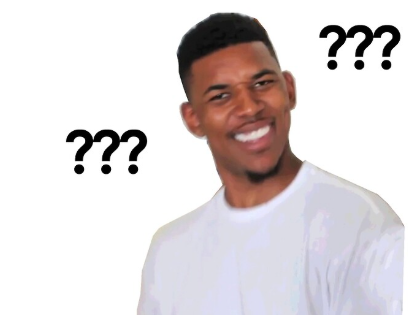

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1).to(device)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)

In [ ]:
model = LogisticRegressionTorch(num_labels=1, input_size=12)
model.to(device)

LogisticRegressionTorch(
  (linear): Linear(in_features=12, out_features=1, bias=True)
)

In [ ]:
model = train_model(model)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
with torch.no_grad():
  log_probs = model(X_test_tensor)
  y_pred = (log_probs >= 0.5).int().cpu()

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80      1307
           1       0.72      0.12      0.21       693

    accuracy                           0.68      2000
   macro avg       0.70      0.55      0.50      2000
weighted avg       0.69      0.68      0.59      2000



Не впечатляет... Видимо, стоит попробовать усложнить модель. Давайте сделаем ее многослойной

### Многослойная модель - V1

In [ ]:
class LogisticRegressionTorch_v1(nn.Module):
    def __init__(self, num_labels, input_size, hidden_size):
        super(LogisticRegressionTorch_v1, self).__init__()
        self.linear_1 = nn.Linear(input_size, hidden_size)
        self.linear_2 = nn.Linear(hidden_size, num_labels)

    def forward(self, x):
        x = self.linear_1(x)
        x = self.linear_2(x)
        y_pred = torch.sigmoid(x)
        return y_pred

In [ ]:
model = LogisticRegressionTorch_v1(num_labels=1, input_size=12, hidden_size=12)
model.to(device)

LogisticRegressionTorch_v1(
  (linear_1): Linear(in_features=12, out_features=12, bias=True)
  (linear_2): Linear(in_features=12, out_features=1, bias=True)
)

In [ ]:
model = train_model(model)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
with torch.no_grad():
  log_probs = model(X_test_tensor)
  y_pred = (log_probs >= 0.5).int().cpu()

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1307
           1       0.66      0.43      0.52       693

    accuracy                           0.73      2000
   macro avg       0.70      0.66      0.67      2000
weighted avg       0.72      0.73      0.71      2000



В более общем виде для большего числа слоев модель может выглядеть так

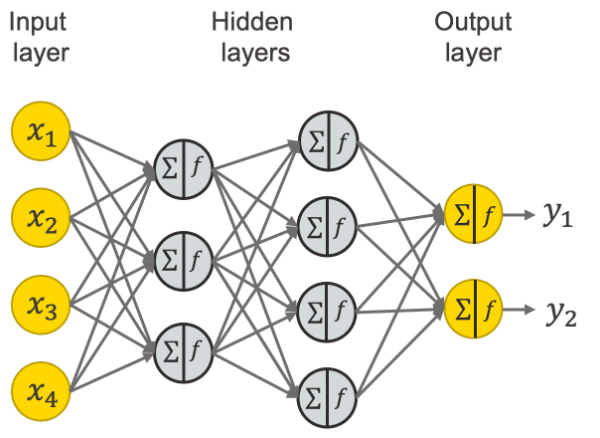

А в матрично-графическом так:

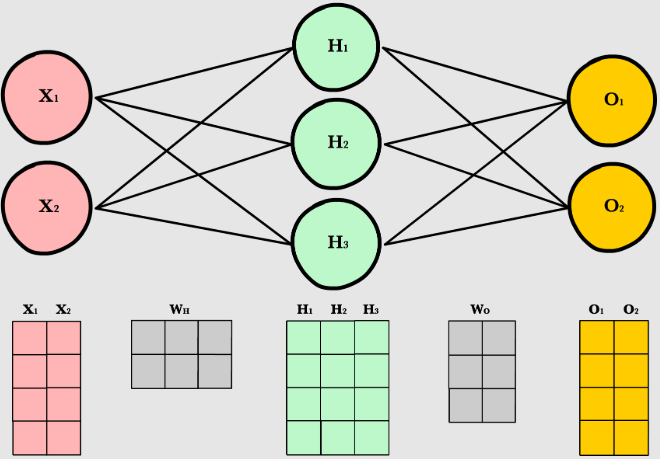

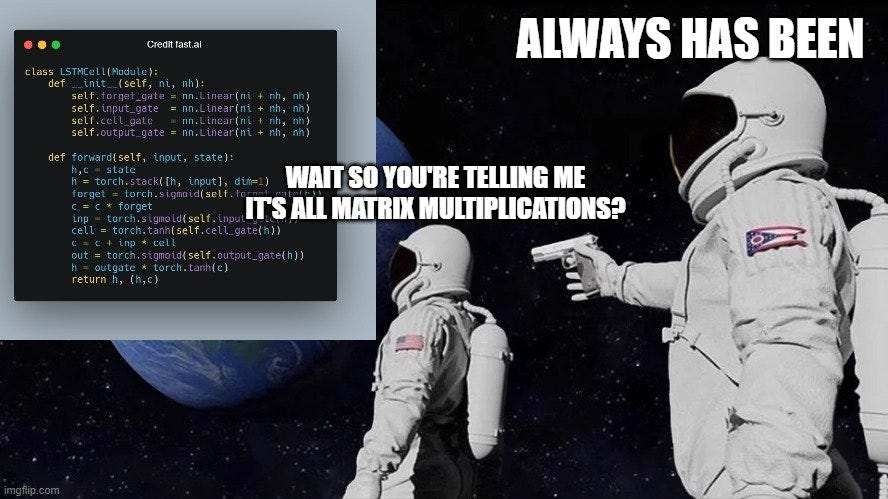

Если присмотреться, можно заметить, что последовательное применение линейныйх слоев к входным данным эквивалентно применению одного классификатора с матрицей весов, равной произведению двух матриц весов линейных слоев, примененных последовательно.

$$\large \text{scores}_1 = x \cdot W_1 $$

$$\large \text{scores}_2 = \text{scores}_1 \cdot W_2 = x  \cdot W_1 \cdot W_2 $$

$$\large W = W_1 \cdot W_2 $$

$$\large \text{scores}_2 = x \cdot W $$

Для того, чтобы последовательно примененные слои не вырождались в один, необходимо применить нелинейность к их выходам.

Ядром вычислений по-прежнему является произведение входов с весовыми коэффициентами.

Таким образом вводится модель искусственного нейрона — базового элемента искусственной нейронной сети. Выходом нейрона является результат применения функции активации к взвешенной сумме входных сигналов (в общем случае с учетом смещения — "bias").


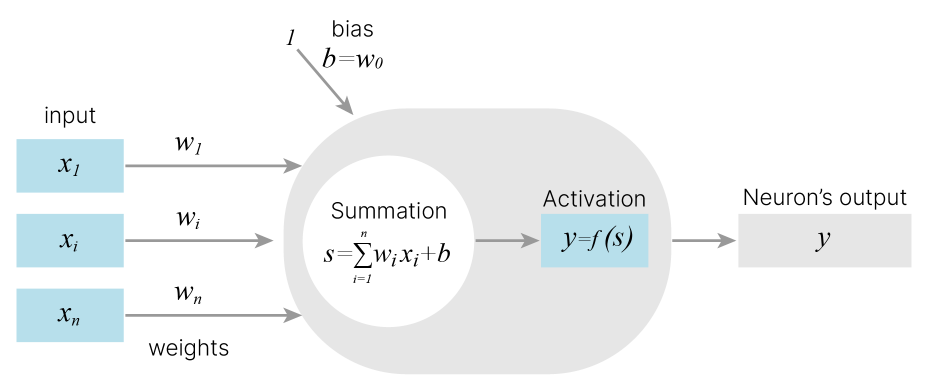

### Многослойная модель - V2

In [ ]:
class LogisticRegressionTorch_v2(nn.Module):
    def __init__(self, num_labels, input_size, hidden_size):
        super(LogisticRegressionTorch_v2, self).__init__()
        self.linear_1 = nn.Linear(input_size, hidden_size)
        self.linear_2 = nn.Linear(hidden_size, num_labels)

    def forward(self, x):
        x = self.linear_1(x)
        x = torch.relu(x)
        x = self.linear_2(x)
        y_pred = torch.sigmoid(x)
        return y_pred

In [ ]:
model = LogisticRegressionTorch_v2(num_labels=1, input_size=12, hidden_size=12)
model.to(device)

LogisticRegressionTorch_v2(
  (linear_1): Linear(in_features=12, out_features=12, bias=True)
  (linear_2): Linear(in_features=12, out_features=1, bias=True)
)

In [ ]:
model = train_model(model)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
with torch.no_grad():
  log_probs = model(X_test_tensor)
  y_pred = (log_probs >= 0.5).int().cpu()

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1307
           1       0.73      0.38      0.50       693

    accuracy                           0.74      2000
   macro avg       0.73      0.65      0.66      2000
weighted avg       0.73      0.74      0.71      2000



### Что мы обучали в этих двух моделях?

**Веса и смещения** являются настраиваемыми параметрами в нейронной сети. Они настраиваются в процессе обучения, поэтому их также называют **обучаемыми параметрами**. Рассмотрим, как различные значения обучаемых параметров влияют на работу одного нейрона. Это поможет нам получить интуицию, как добавление в модель скрытых слоев с нелинейностями наделяет её большей выразительной способностью.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/why_add_bias_example.png" width="500"></center>

Рассмотрим простой пример. На вход нейрона подаётся входное значение $x$, умноженное на вес $w$. После применения сигмоидальной функции активации, в зависимости от веса, при всевозможных значениях входа мы можем получить следующие графики при $w$, равном $0.5$, $1$ и $2$:

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = 2.5

for w in [0.5, 1, 2]:
  wx = w * x
  y = sigmoid(wx)
  print(f'w={w} x={x} y={y}')

w=0.5 x=2.5 y=0.7772998611746911
w=1 x=2.5 y=0.9241418199787566
w=2 x=2.5 y=0.9933071490757153


<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/sigmoid_with_different_weights.png" width="700"></center>

Можно заметить, что значение веса меняет **крутизну** итоговой сигмоидальной функции.

Но что, если требуется, чтобы при $wx=5$ нейрон выдавал $0$? Изменением крутизны сигмоиды этого не добиться. Требуется дополнительный параметр — смещение.


**Смещение** (англ. bias) — это дополнительный коэффициент, прибавляющийся к взвешенной сумме входов. Наличие смещения позволяет сдвинуть функцию активации влево или вправо.



<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/add_bias_example.png" width="500"></center>

In [ ]:
x, w = 2.5, 1

for b in [-5, 0, 5]:
  wx = w * x + b
  y = sigmoid(wx)
  print(f'b={b} x={x} y={y}')

b=-5 x=2.5 y=0.07585818002124355
b=0 x=2.5 y=0.9241418199787566
b=5 x=2.5 y=0.9994472213630764


Тогда при смещениях, равных $5$, $0$ и $-5$, мы можем получить сдвинутые функции активации, что способствует лучшему обучению нейронной сети:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/sigmoid_with_different_biases.png" width="700"></center>

В PyTorch мы можем (и потом даже будем) реализовывать собственные слои с параметрами для обучения.

Простейшая имплементация слоя `Linear` могла бы выглядеть так:

In [ ]:
class CustomLinear(nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.weights = nn.Parameter(torch.rand((dim_in, dim_out)))
        self.bias = nn.Parameter(torch.rand(dim_out))

    def forward(self, X):
        return X@self.weights + self.bias

Но на самом деле в PyTorch она выглядит [так](https://pytorch.org/docs/stable/_modules/torch/nn/modules/linear.html#Linear)

### Нейронная сеть как универсальный аппроксиматор

Известным теоретическим результатом в области нейронных сетей является **теорема об универсальной аппроксимации**, или [теорема Цыбенко 📚[wiki]](https://ru.wikipedia.org/wiki/Теорема_Цыбенко). Она гласит следующее:

> Искусственная нейронная сеть прямого распространения с одним скрытым слоем и сигмоидальными функциями активации может поточечно аппроксимировать любую непрерывную функцию многих переменных с любой наперед заданной точностью.

Условиями универсальной аппроксимации являются достаточное количество нейронов скрытого слоя и правильный подбор параметров (весовых коэффициентов и смещений) нейросети.

Данный результат неконструктивен, поскольку он не говорит, *сколько необходимо скрытых нейронов* для аппроксимации той или иной функции, а также *как следует подбирать веса и смещения*. Однако он дает основания полагать, что для аппроксимации любой функции с помощью нейросети **достаточно** одного скрытого слоя с нелинейностями в виде сигмоиды.

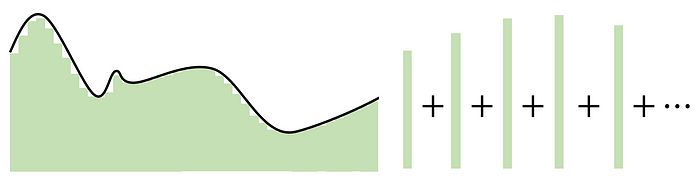